In [373]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from scipy.signal import welch, butter, filtfilt
from scipy.signal import detrend
from scipy.signal import spectrogram, get_window
from scipy.stats import zscore
from scipy.integrate import simpson


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         print("")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns

#these csv files, i want to show the graphs 
#10e83d6550.csv
#3e9a43491a.csv only turns 
#6670936848.csv 


#function to see the occurance of events over time 
def plot_event_occurrences(time, events, event_names, dataframe): 
    event_cols = ['StartHesitation','Turn','Walking']
    print(dataframe[event_cols].sum())

    plt.figure(figsize=(12,4))
    for col in event_cols:
        plt.plot(dataframe['time_seconds'], dataframe[col], label=col)
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Event Indicator')
    plt.title('FOG Events Over Time')
    plt.show()



In [374]:
dataset_1 = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/10e83d6550.csv"
dataset_2 = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/3e9a43491a.csv"
dataset_3 = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/6670936848.csv"
df = pd.read_csv(dataset_1)
df2 = pd.read_csv(dataset_2)
df3 = pd.read_csv(dataset_3)

In [375]:
#calculate magnitude of acceleration
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

In [376]:
#convert timestep to seconds, new column 
hertz = 128  
df['time_seconds'] = df['Time'] / hertz
df2['time_seconds'] = df2['Time'] / hertz
df3['time_seconds'] = df3['Time'] / hertz

#calculate magnitude and add as new column
df['Magnitude'] = calculate_magnitude(df['AccV'], df['AccML'], df['AccAP'])
df2['Magnitude'] = calculate_magnitude(df2['AccV'], df2['AccML'], df2['AccAP'])
df3['Magnitude'] = calculate_magnitude(df3['AccV'], df3['AccML'], df3['AccAP'])

print(df.head())
#print(df['time_seconds'].max())
print(df2.head())
print(df3.head())

# print(df.columns)
# print(df.shape)
# print(df.isnull().sum())
# print(df[['AccV','AccML','AccAP']].describe())

# print(df2.columns)
# print(df2.shape)
# print(df2.isnull().sum())
# print(df2[['AccV','AccML','AccAP']].describe())

# print(df3.columns)
# print(df3.shape)
# print(df3.isnull().sum())
# print(df3[['AccV','AccML','AccAP']].describe())
df.head(50)

   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
0     0 -9.687117 -1.238445 -1.932528                0     0        0   
1     1 -9.686484 -1.233967 -1.932522                0     0        0   
2     2 -9.683087 -1.236049 -1.936234                0     0        0   
3     3 -9.684048 -1.240766 -1.937733                0     0        0   
4     4 -9.683254 -1.239990 -1.942938                0     0        0   

   time_seconds  Magnitude  
0      0.000000   9.955332  
1      0.007812   9.954160  
2      0.015625   9.951834  
3      0.023438   9.953648  
4      0.031250   9.953793  
   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
0     0 -9.505363  0.675182 -1.361107                0     0        0   
1     1 -9.509803  0.677602 -1.363267                0     0        0   
2     2 -9.496094  0.686661 -1.362991                0     0        0   
3     3 -9.491545  0.684340 -1.362992                0     0        0   
4     4 -9.493475  0.6

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,time_seconds,Magnitude
0,0,-9.687117,-1.238445,-1.932528,0,0,0,0.000000,9.955332
1,1,-9.686484,-1.233967,-1.932522,0,0,0,0.007812,9.954160
2,2,-9.683087,-1.236049,-1.936234,0,0,0,0.015625,9.951834
3,3,-9.684048,-1.240766,-1.937733,0,0,0,0.023438,9.953648
4,4,-9.683254,-1.239990,-1.942938,0,0,0,0.031250,9.953793
5,5,-9.684829,-1.240005,-1.942941,0,0,0,0.039062,9.955327
6,6,-9.684668,-1.239889,-1.944427,0,0,0,0.046875,9.955446
7,7,-9.685746,-1.240870,-1.946666,0,0,0,0.054688,9.957054
8,8,-9.685559,-1.245318,-1.943694,0,0,0,0.062500,9.956848
9,9,-9.683263,-1.243052,-1.945175,0,0,0,0.070312,9.954621


In [377]:
#plot acceleration, accelerometer data, time should be in seconds 
def plot_acceleration_data(time, x, y, z, dataframe):
    plt.figure(figsize=(12, 6))
    plt.plot(time, x, label='AccV (Vertical)', color='r', linewidth = 0.5)
    plt.plot(time, y, label='AccML (Medio-Lateral)', color='g', linewidth = 0.5)
    plt.plot(time, z, label='AccAP (Antero-Posterior)', color='b', linewidth = 0.5)

    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.title('Acceleration over Time')

    #show event occurances on the same plot, but as highlighted sections
    event_cols = ['StartHesitation', 'Turn', 'Walking']
    colors = {'StartHesitation':'red', 'Turn':'green', 'Walking':'blue'}
    
    for col in event_cols:
        if col in dataframe.columns:
            in_event = False
            start_time = None
            first_span = True
            for t, val in zip(time, dataframe[col]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t
                elif val == 0 and in_event:
                    in_event = False
                    plt.axvspan(start_time, t, color=colors[col], alpha=0.1,
                                label=col if first_span else "")
                    first_span = False
            # If event lasts until the end
            if in_event:
                plt.axvspan(start_time, time.iloc[-1], color=colors[col], alpha=0.1,
                            label=col if first_span else "")
 
    plt.legend()
    plt.xlim(0,20)
    plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


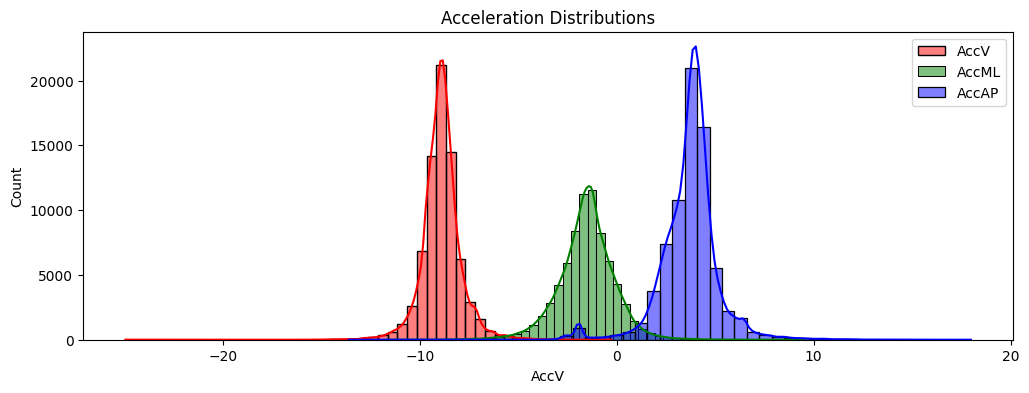

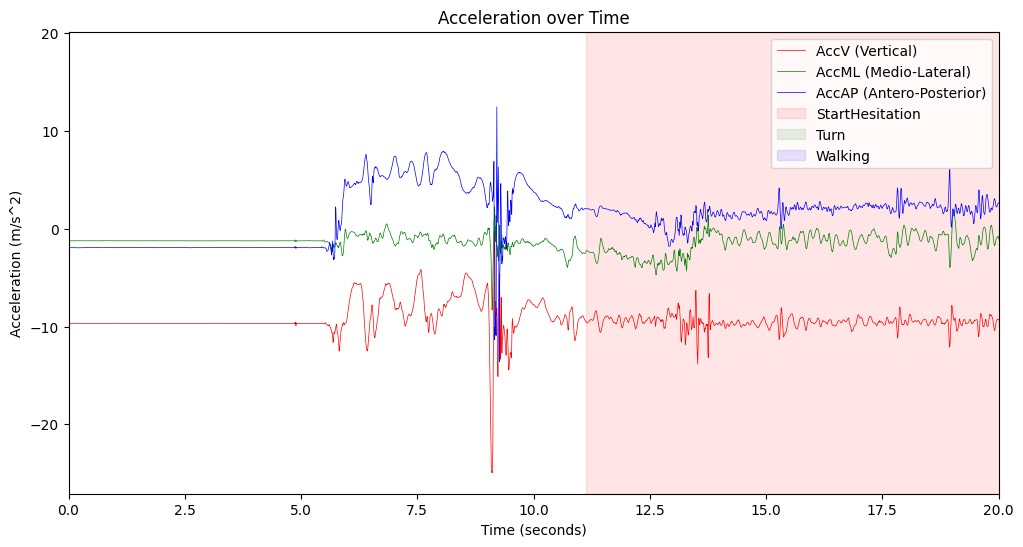

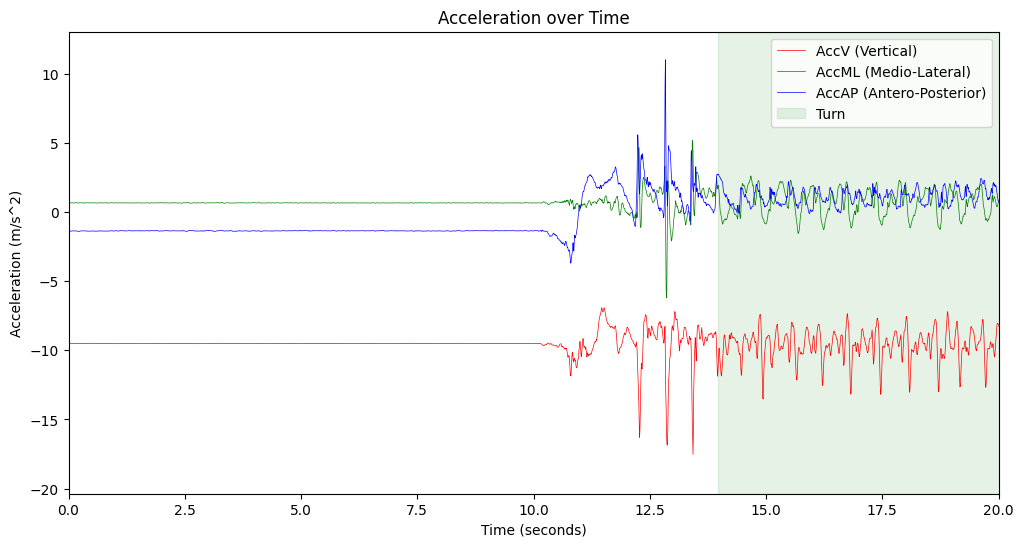

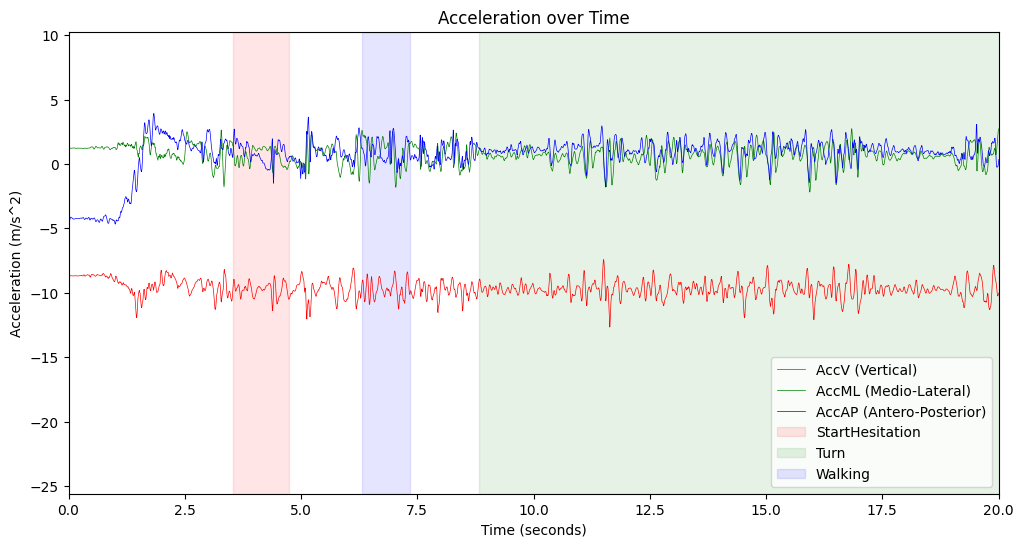

In [378]:
def main():
    #histograms
    plt.figure(figsize=(12,4))
    sns.histplot(df['AccV'], bins=50, kde=True, color='r', label='AccV', alpha=0.5)
    sns.histplot(df['AccML'], bins=50, kde=True, color='g', label='AccML', alpha=0.5)
    sns.histplot(df['AccAP'], bins=50, kde=True, color='b', label='AccAP', alpha=0.5)
    plt.legend()
    plt.title("Acceleration Distributions")
    plt.show()

    #acceleration plot function
    plot_acceleration_data(df['time_seconds'], df['AccV'], df['AccML'], df['AccAP'], df)
    plot_acceleration_data(df2['time_seconds'], df2['AccV'], df2['AccML'], df2['AccAP'], df2)
    plot_acceleration_data(df3['time_seconds'], df3['AccV'], df3['AccML'], df3['AccAP'], df3)


    #plot event occurrences over time 
    # plot_event_occurrences(df['time_seconds'], df[['StartHesitation','Turn','Walking']], ['StartHesitation','Turn','Walking'], df)
    # plot_event_occurrences(df2['time_seconds'], df2[['StartHesitation','Turn','Walking']], ['StartHesitation','Turn','Walking'], df2)
    # plot_event_occurrences(df3['time_seconds'], df3[['StartHesitation','Turn','Walking']], ['StartHesitation','Turn','Walking'], df3)
    
if __name__ == "__main__":
    main()

In [379]:
"""
Computes and plots the combined fast Fourier Transform of all accelerometer axes,
highlights outlier frequencies based on IQR --> < or > 1.5 * IQR is an outlier

Parameters: dataframe, the sampling freq in Hz (default = 128)
"""
def plot_combined_fft(df, fs=128):
    # Combine accelerometer axes into one signal (magnitude)
    combined_signal = np.sqrt(df['AccV']**2 + df['AccML']**2 + df['AccAP']**2)
    
    # Remove DC offset
    combined_signal -= np.mean(combined_signal)
    
    # Compute FFT
    N = len(combined_signal)
    fft_values = np.fft.fft(combined_signal)
    fft_freq = np.fft.fftfreq(N, 1/fs)

    # Use only positive frequencies
    mask = fft_freq >= 0
    fft_freq = fft_freq[mask]
    fft_magnitude = np.abs(fft_values[mask]) / N

    #computer IQR
    Q1 = np.percentile(fft_magnitude, 25)
    Q3 = np.percentile(fft_magnitude, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = np.where((fft_magnitude < lower_bound) | (fft_magnitude > upper_bound))[0]
    outlier_freqs = fft_freq[outlier_indices]
    outlier_mags = fft_magnitude[outlier_indices]
    #identify outliers

    # Plot FFT with outliers highlighted
    plt.figure(figsize=(10, 4))
    plt.plot(fft_freq, fft_magnitude, label='FFT Magnitude')
    plt.scatter(outlier_freqs, outlier_mags, color='red', label='Outliers', zorder=2)
    plt.title("Fourier Transform (FFT) with IQR Outlier Detection")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # return {
    #     'fft_freq': fft_freq,
    #     'fft_magnitude': fft_magnitude,
    #     'IQR': IQR,
    #     'outlier_indices': outlier_indices,
    #     'outlier_freqs': outlier_freqs,
    #     'outlier_mags': outlier_mags
    # }
    

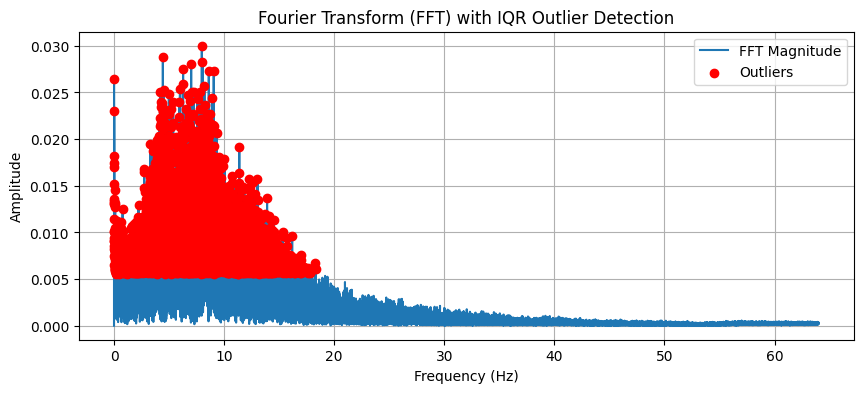

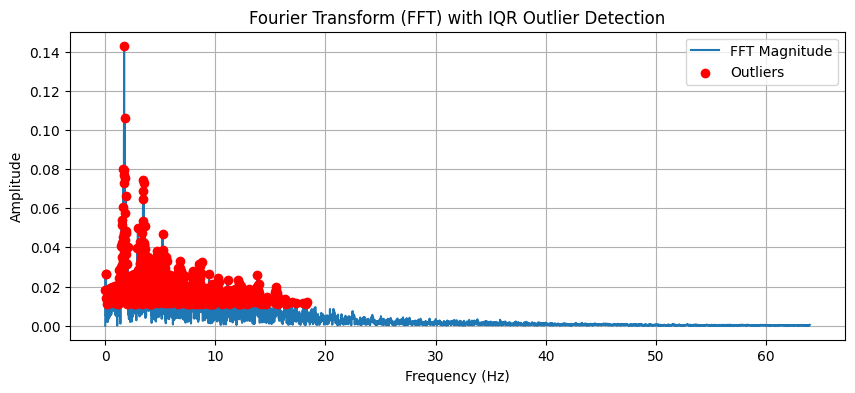

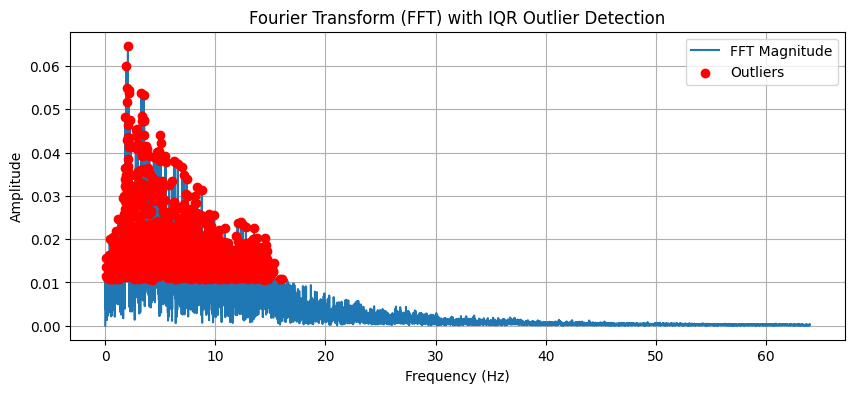

In [380]:
plot_combined_fft(df, fs=128)
plot_combined_fft(df2, fs=128)
plot_combined_fft(df3, fs=128)

# Spectrogram 
### We can see the fog events, but the parameters need to be fixed

In [381]:
"""
compute and plot spectrogram of combined accelerometer signal, 
highlight time-frequency bins that are statistical outliers (IQR)

Parameters: dataframe, fs, nperseg (length of each segment for FFT default = 256)
"""
def plot_spectrogram(df, fs=128, nperseg=512):
    # Combine axes into one magnitude signal
    combined_signal = np.sqrt(df['AccV']**2 + df['AccML']**2 + df['AccAP']**2)
    combined_signal -= np.mean(combined_signal)  # remove DC offset

    # Compute spectrogram
    f, t, Sxx = spectrogram(combined_signal, fs=fs, nperseg=nperseg)
    Sxx_log = 10 * np.log10(Sxx + 1e-12)  # convert to dB for better visibility

    # Plot spectrogram
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t, f, Sxx_log, shading='gouraud', cmap='viridis')
    plt.colorbar(label='Power (dB)')
    plt.title("Spectrogram (no outlier detection)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    # Highlight FOG events
    event_cols = ['StartHesitation', 'Turn', 'Walking']
    colors = {'StartHesitation':'red', 'Turn':'green', 'Walking':'blue'}
    fog_mask = np.zeros(len(df), dtype=bool)
    
    for col in event_cols:
        if col in df.columns:
            in_event = False
            start_time = None
            first_span = True
            for t_idx, val in zip(df.index / fs, df[col]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t_idx
                elif val == 0 and in_event:
                    in_event = False
                    plt.axvspan(start_time, t_idx, color=colors[col], alpha=0.2,
                                label=col if first_span else "")
                    first_span = False
             # Build mask for stats
            fog_mask |= (df[col] == 1)
            if in_event:
                plt.axvspan(start_time, df.index[-1] / fs, color=colors[col], alpha=0.2,
                            label=col if first_span else "")

    

    plt.legend()
    plt.xlim(0, 80)  # Optional: focus on first 20
    plt.ylim(0,25)
    plt.show()

    # ===== Compute statistics before, during, and after FOG =====
    fog_indices = np.where(fog_mask)[0]
    if len(fog_indices) > 0:
        fog_start = fog_indices[0]
        fog_end = fog_indices[-1]

        before = combined_signal[:fog_start]
        during = combined_signal[fog_start:fog_end]
        after = combined_signal[fog_end:]

        def compute_stats(segment):
            return {
                "mean": np.mean(segment),
                "std": np.std(segment),
                "rms": np.sqrt(np.mean(segment**2)),
                "energy": np.sum(segment**2)
            }

        stats_before = compute_stats(before)
        stats_during = compute_stats(during)
        stats_after = compute_stats(after)

        print("\nSignal Statistics:")
        print(f"Before FOG  (0 - {fog_start/fs:.2f}s): {stats_before}")
        print(f"During FOG  ({fog_start/fs:.2f}s - {fog_end/fs:.2f}s): {stats_during}")
        print(f"After FOG   ({fog_end/fs:.2f}s - {len(df)/fs:.2f}s): {stats_after}")

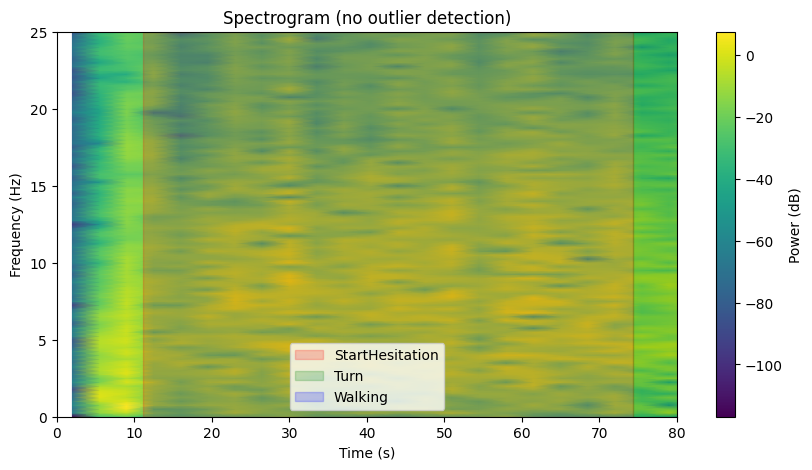


Signal Statistics:
Before FOG  (0 - 11.12s): {'mean': -0.024688723441276247, 'std': 1.6551952704163484, 'rms': 1.6553793874135942, 'energy': 3902.1600247739007}
During FOG  (11.12s - 575.09s): {'mean': 0.00016876684865833882, 'std': 1.1003539359012617, 'rms': 1.10035394884357, 'energy': 87403.70093376024}
After FOG   (575.09s - 580.99s): {'mean': 0.03042887537673559, 'std': 1.1050956071044, 'rms': 1.1055144582040242, 'energy': 922.7324740600934}


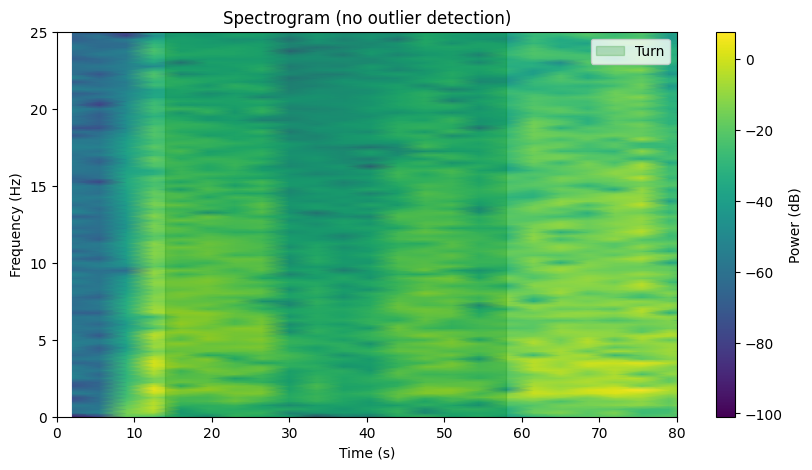


Signal Statistics:
Before FOG  (0 - 13.98s): {'mean': -0.05785374278467129, 'std': 0.8713180324935617, 'rms': 0.8732366055672692, 'energy': 1364.1879408824345}
During FOG  (13.98s - 57.97s): {'mean': -0.0117991329648747, 'std': 0.6043927413115943, 'rms': 0.604507903413071, 'energy': 2057.7352335816095}
After FOG   (57.97s - 85.74s): {'mean': 0.04780344966722331, 'std': 1.2849204994405785, 'rms': 1.2858094181031319, 'energy': 5877.502331172051}


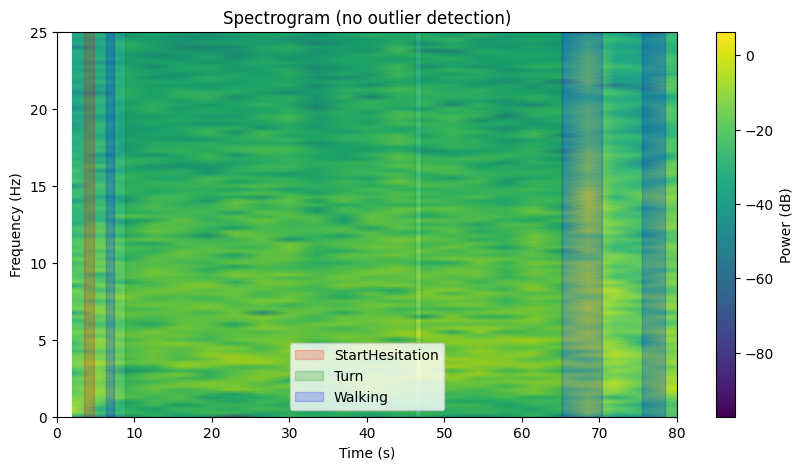


Signal Statistics:
Before FOG  (0 - 3.53s): {'mean': -0.06509981627383328, 'std': 0.5477915323283025, 'rms': 0.5516462172166834, 'energy': 137.54972413420325}
During FOG  (3.53s - 98.28s): {'mean': -0.0026850970068269843, 'std': 0.8678426981273576, 'rms': 0.8678468519496445, 'energy': 9134.302145547077}
After FOG   (98.28s - 108.73s): {'mean': 0.04633032395708228, 'std': 1.7204597576171345, 'rms': 1.7210834600617066, 'energy': 3963.3276339542927}


In [382]:
plot_spectrogram(df)
plot_spectrogram(df2)
plot_spectrogram(df3)

# Feature engineering: Energy
### Here we added more features on energy and frequencies

In [383]:
def accel_magnitude(df):
    return np.sqrt(df['AccV']**2 + df['AccML']**2 + df['AccAP']**2)

def butter_lowpass_filter(signal, cutoff=15, fs=128, order=2):
    nyquist = 0.5 * fs
    norm_cutoff = cutoff / nyquist
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

In [384]:
def compute_fft_window_energy(
    df, 
    fs=128, 
    window_sec=3.0, 
    overlap=0.5,
    fog_fraction_threshold=0.5,
    freq_limit=15
):
    """
    Computes FFT energy features for each window:
        - Magnitude FFT energies
        - Individual axis FFT energies (AccV, AccML, AccAP)
        - One-hot FoG labels
        - Binary label: FoG vs NonFoG
    """

    # 1. Magnitude signal ------------------------------------
    x_mag = accel_magnitude(df)
    x_mag = butter_lowpass_filter(x_mag, cutoff=15, fs=fs)
    x_mag = x_mag - np.mean(x_mag)

    # 1b. Individual axes -------------------------------------
    axes = {
        "V":    df["AccV"].to_numpy(),
        "ML":   df["AccML"].to_numpy(),
        "AP":   df["AccAP"].to_numpy(),
    }
    # Apply same filtering
    for k in axes:
        axes[k] = butter_lowpass_filter(axes[k], cutoff=15, fs=fs)
        axes[k] = axes[k] - np.mean(axes[k])

    # 2. Raw FoG events ---------------------------------------
    fog_cols = [c for c in ["StartHesitation", "Turn", "Walking"] if c in df.columns]
    fog_matrix = df[fog_cols].to_numpy()

    # 3. Windowing --------------------------------------------
    win = int(window_sec * fs)
    hop = int(win * (1 - overlap))
    N = len(x_mag)

    rows = []

    # 4. Loop through windows ---------------------------------
    for s in range(0, N - win, hop):
        e = s + win

        # ---- CLASSIFICATION ----
        window_events = fog_matrix[s:e].mean(axis=0)
        max_idx = np.argmax(window_events)
        max_val = window_events[max_idx]

        if max_val >= fog_fraction_threshold:
            active_event = fog_cols[max_idx]
        else:
            active_event = None

        onehot = {
            "StartHesitation_onehot": 1 if active_event == "StartHesitation" else 0,
            "Turn_onehot":            1 if active_event == "Turn" else 0,
            "Walking_onehot":         1 if active_event == "Walking" else 0,
        }

        binary_label = "FoG" if any(onehot.values()) else "NonFoG"

        # ---- FFT ENERGY FUNCTION ----
        def compute_energy(signal):
            seg = signal[s:e]
            seg = seg - np.mean(seg)

            freqs = np.fft.rfftfreq(len(seg), d=1/fs)
            mag   = np.abs(np.fft.rfft(seg)) / len(seg)

            # limit frequency range
            mask = freqs <= freq_limit
            freqs = freqs[mask]
            mag   = mag[mask]

            # energy bands
            low_mask  = (freqs >= 0.5) & (freqs <= 3)
            high_mask = (freqs > 3)    & (freqs <= 8)

            low  = simpson(mag[low_mask], freqs[low_mask]) if low_mask.sum()>1 else 0
            high = simpson(mag[high_mask], freqs[high_mask]) if high_mask.sum()>1 else 0
            total = simpson(mag, freqs)

            return low, high, total

        # ---- Magnitude FFT energies ----
        low_mag, high_mag, total_mag = compute_energy(x_mag)

        # ---- Per-axis FFT energies ----
        V_low, V_high, V_total     = compute_energy(axes["V"])
        ML_low, ML_high, ML_total  = compute_energy(axes["ML"])
        AP_low, AP_high, AP_total  = compute_energy(axes["AP"])

        # ---- Ratio metrics ----
        energy_ratio = high_mag / low_mag if low_mag > 0 else np.nan
        freeze_index = (high_mag**2) / (low_mag**2) if low_mag > 0 else np.nan

        # ---- Build row ----
        row = {
            "start_time": s / fs,
            "end_time": e / fs,
            "label": binary_label,

            # magnitude features
            "low_energy": low_mag,
            "high_energy": high_mag,
            "total_energy": total_mag,
            "energy_ratio": energy_ratio,
            "freeze_index": freeze_index,

            # V-axis features
            "V_low_energy": V_low,
            "V_high_energy": V_high,
            "V_total_energy": V_total,

            # ML-axis features
            "ML_low_energy": ML_low,
            "ML_high_energy": ML_high,
            "ML_total_energy": ML_total,

            # AP-axis features
            "AP_low_energy": AP_low,
            "AP_high_energy": AP_high,
            "AP_total_energy": AP_total,
        }

        row.update(onehot)
        rows.append(row)

    return pd.DataFrame(rows)

In [385]:
energy_df = compute_fft_window_energy(df)
energy_df2 = compute_fft_window_energy(df2)
energy_df3 = compute_fft_window_energy(df3)
energy_df.head(50)

,start_time,end_time,label,low_energy,high_energy,total_energy,energy_ratio,freeze_index,V_low_energy,V_high_energy,V_total_energy,ML_low_energy,ML_high_energy,ML_total_energy,AP_low_energy,AP_high_energy,AP_total_energy,StartHesitation_onehot,Turn_onehot,Walking_onehot
0,0.0,3.0,NonFoG,0.000379,0.000747,0.001988,1.974049,3.896870,0.000406,0.000583,0.001712,0.000454,0.001126,0.003027,0.001731,0.003274,0.008176,0,0,0
1,1.5,4.5,NonFoG,0.000519,0.000731,0.002026,1.408387,1.983554,0.000283,0.000708,0.001588,0.000336,0.001186,0.002643,0.001705,0.003670,0.008621,0,0,0
2,3.0,6.0,NonFoG,0.127866,0.122340,0.394465,0.956785,0.915437,0.147544,0.144451,0.423847,0.081424,0.129635,0.336105,0.549707,0.421246,1.420307,0,0,0
3,4.5,7.5,NonFoG,0.544862,0.525531,1.341111,0.964521,0.930300,0.637625,0.485832,1.617950,0.212514,0.142353,0.565137,0.794072,0.413179,2.592682,0,0,0
4,6.0,9.0,NonFoG,0.720032,0.555522,1.824491,0.771524,0.595249,0.700347,0.465240,1.601512,0.200432,0.141645,0.501011,0.419004,0.378295,1.218137,0,0,0
5,7.5,10.5,NonFoG,0.880913,1.332573,3.336493,1.512718,2.288315,0.864117,1.513095,3.703048,0.168760,0.442262,1.047215,0.848166,0.673309,3.142672,0,0,0
6,9.0,12.0,NonFoG,0.659607,1.208454,2.979444,1.832081,3.356521,0.598163,1.416521,3.136649,0.187629,0.546389,1.186048,0.644520,0.613764,2.630402,0,0,0
7,10.5,13.5,FoG,0.164669,0.346111,0.768692,2.101856,4.417799,0.176087,0.371929,0.806395,0.205863,0.287508,0.827821,0.284654,0.139786,0.863085,1,0,0
8,12.0,15.0,FoG,0.150255,0.214507,0.722887,1.427625,2.038114,0.155477,0.215225,0.802966,0.257938,0.227134,1.071849,0.248970,0.197253,0.882924,1,0,0
9,13.5,16.5,FoG,0.090660,0.280995,0.668558,3.099439,9.606521,0.093805,0.272259,0.674816,0.169923,0.349808,0.755581,0.089654,0.179441,0.588453,1,0,0


# FFT Energy over time graphs 

In [386]:
# def plot_energy_time(energy_df):
#     plt.figure(figsize=(12,5))
#     plt.plot(energy_df["start_time"], energy_df["energy"], marker="o")
#     plt.xlabel("Time (s)")
#     plt.ylabel("FFT Energy (0–15 Hz)")
#     plt.title("Window-Level FFT Energy")
#     plt.grid(True)
#     plt.show()
    
#     plt.figure(figsize=(14,6))
    
#     # map each label to a color
#     color_map = {
#         "FoG": "red",
#         "Walking": "green",
#         "Inactive": "blue"
#     }
    
#     colors = energy_df["label"].map(color_map)

#     plt.scatter(
#         energy_df["start_time"],
#         energy_df["energy"],
#         c=colors,
#         s=60
#     )
    
#     plt.xlabel("Time (s)")
#     plt.ylabel("FFT Energy")
#     plt.title("FFT Energy Over Time (Colored by Label)")
#     plt.grid(True)
#     plt.show()
    
#     plt.figure(figsize=(14,3))
    
#     for _, row in energy_df.iterrows():
#         color = color_map[row["label"]]
#         plt.hlines(1, row["start_time"], row["end_time"], colors=color, linewidth=6)
    
#     plt.yticks([])
#     plt.xlabel("Time (s)")
#     plt.title("Label Timeline (FoG / Walking / Inactive)")
#     plt.show()
    
#     plt.figure(figsize=(14,6))
#     plt.plot(energy_df.start_time, energy_df.energy, 'k-', label="Energy")
    
#     for _, row in energy_df.iterrows():
#         if row.label == "FoG":
#             plt.axvspan(row.start_time, row.end_time, color="red", alpha=0.3)
#         elif row.label == "Walking":
#             plt.axvspan(row.start_time, row.end_time, color="green", alpha=0.15)
#         else:
#             plt.axvspan(row.start_time, row.end_time, color="blue", alpha=0.15)
    
#     plt.xlabel("Time (s)")
#     plt.ylabel("FFT Energy")
#     plt.title("FFT Energy Over Time with Activity Labels")
#     plt.grid(True)
#     plt.show()

In [387]:
# plot_energy_time(energy_df)
# plot_energy_time(energy_df2)
# plot_energy_time(energy_df3)

In [388]:
data_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/*.csv"
files = glob.glob(data_path)
print("Number of files found:", len(files))

Number of files found: 833


# Sampling multiple datasets to create a large one to test models on

In [389]:
data_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/*.csv"

# load all files (change to be random)
files = glob.glob(data_path)

import random

num_samples = 100   # change this number anytime
file_list = random.sample(files, num_samples)

print("Using", len(file_list), "files out of", len(files))

print("Number of files:", len(file_list))
print(file_list[:5])  # preview

#run the fft energy function on every file 
all_results = []

for file in file_list:
    df = pd.read_csv(file)
    
    features_df = compute_fft_window_energy(df)  # your function
    features_df["file_id"] = file.split("/")[-1].replace(".csv","")
    
    all_results.append(features_df)

#combine it into 1 dataset 
full_dataset = pd.concat(all_results, ignore_index=True)

print(full_dataset.head())
print(full_dataset.shape)


Using 20 files out of 833
Number of files: 20
['/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/da763363b6.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/67624d0d1c.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/826fc99615.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/c261b476e8.csv', '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/851ad1ba6a.csv']
   start_time  end_time   label  low_energy  high_energy  total_energy  \
0         0.0       3.0  NonFoG    0.000574     0.001031      0.002849   
1         1.5       4.5  NonFoG    0.000547     0.001199      0.003209   
2         3.0       6.0  NonFoG    0.000559     0.001105      0.003220   
3         4.5       7.5  NonFoG    0.000508     0.000844      0.002873   
4         6.0       9.0  NonFoG    0.000740     0.001090      0.003158   

   energy_ratio  freeze_index  V_low_energy  V_high_energy  ...  \
0

use polar instead of pandas 

# Feature Engineering: TS Fresh

In [390]:
pip install tsfresh

Note: you may need to restart the kernel to use updated packages.


In [391]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [392]:
from tsfresh import extract_features

In [393]:
extracted_features = extract_features(energy_df, column_id="label", column_sort="start_time", n_jobs=0)

Feature Extraction: 100%|██████████| 36/36 [00:08<00:00,  4.09it/s]


In [394]:
print(timeseries.head())

print(energy_df.head())
#id is fog and nonfog 

print(extracted_features)
#shap for tree based models 
# cnn 
#time shap

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0
   start_time  end_time   label  low_energy  high_energy  total_energy  \
0         0.0       3.0  NonFoG    0.000379     0.000747      0.001988   
1         1.5       4.5  NonFoG    0.000519     0.000731      0.002026   
2         3.0       6.0  NonFoG    0.127866     0.122340      0.394465   
3         4.5       7.5  NonFoG    0.544862     0.525531      1.341111   
4         6.0       9.0  NonFoG    0.720032     0.555522      1.824491   

   energy_ratio  freeze_index  V_low_energy  V_high_energy  V_total_energy  \
0      1.974049      3.896870      0.000406       0.000583        0.001712   
1      1.408387      1.983554      0.000283       0.000708        0.001588   
2      0.956785      0.915437      0.147544       0.144451        0.4

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


# Shap: Evaluate features a model utilizes

In [395]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [396]:
import xgboost

import shap

In [397]:
# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

#you can see correlation between features in shap 
#you can drop one of them if they are correlated or merge 2 features, or calculate a relationsip
#called shap partial dependence 

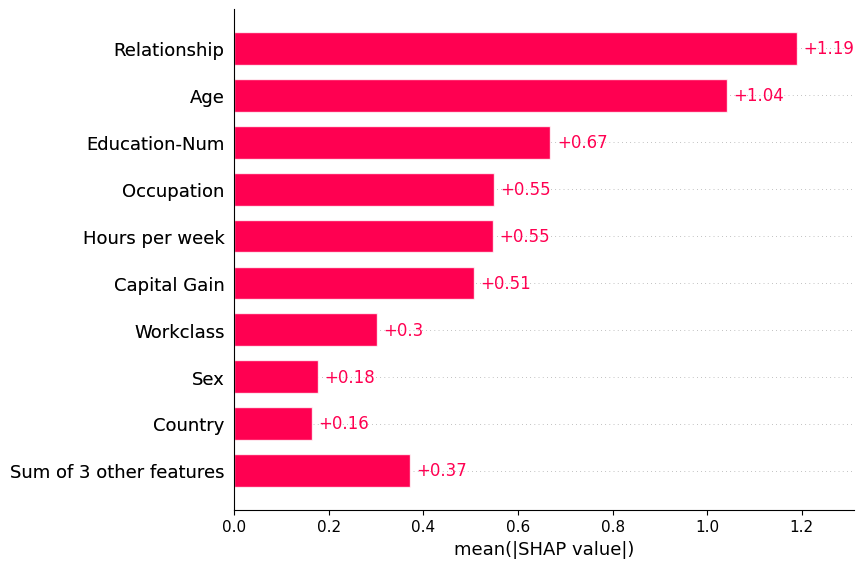

In [398]:
shap.plots.bar(shap_values)

In [399]:
#focus on models 
# 1. create decision tree model 
# 2. perform evaluation metrics on it 
# 3. create random forest model 
# 4. perform evaluation metrics on it 
# 5. try shap to see the features that work for these models 
# 6. narrow down features 

# Decision Tree Model

In [400]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV #split into training and test sets
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve #this used to evaluate the model 

In [401]:
energy_df.head()

,start_time,end_time,label,low_energy,high_energy,total_energy,energy_ratio,freeze_index,V_low_energy,V_high_energy,V_total_energy,ML_low_energy,ML_high_energy,ML_total_energy,AP_low_energy,AP_high_energy,AP_total_energy,StartHesitation_onehot,Turn_onehot,Walking_onehot
0,0.0,3.0,NonFoG,0.000379,0.000747,0.001988,1.974049,3.896870,0.000406,0.000583,0.001712,0.000454,0.001126,0.003027,0.001731,0.003274,0.008176,0,0,0
1,1.5,4.5,NonFoG,0.000519,0.000731,0.002026,1.408387,1.983554,0.000283,0.000708,0.001588,0.000336,0.001186,0.002643,0.001705,0.003670,0.008621,0,0,0
2,3.0,6.0,NonFoG,0.127866,0.122340,0.394465,0.956785,0.915437,0.147544,0.144451,0.423847,0.081424,0.129635,0.336105,0.549707,0.421246,1.420307,0,0,0
3,4.5,7.5,NonFoG,0.544862,0.525531,1.341111,0.964521,0.930300,0.637625,0.485832,1.617950,0.212514,0.142353,0.565137,0.794072,0.413179,2.592682,0,0,0
4,6.0,9.0,NonFoG,0.720032,0.555522,1.824491,0.771524,0.595249,0.700347,0.465240,1.601512,0.200432,0.141645,0.501011,0.419004,0.378295,1.218137,0,0,0


In [407]:
# 1. Remove any old dummy columns
#energy_df = energy_df.loc[:, ~energy_df.columns.str.contains('label_')]

# 2. Ensure no duplicate columns exist
#energy_df = energy_df.loc[:, ~energy_df.columns.duplicated()]

# # 3. Identify object columns
# to_encode = energy_df.select_dtypes(include=['object']).columns.tolist()

# # 4. One-hot encode
# energy_df = pd.get_dummies(energy_df, columns=to_encode, prefix=to_encode)

# Create a single binary label: 1 = FoG, 0 = NonFoG
#energy_df['label'] = energy_df['label'].astype(int)
# label_col = 'label'
# label_dummy = pd.get_dummies(energy_df[label_col], prefix=label_col)
# #energy_df = energy_df.drop(columns=energy_df[label_col])
# energy_df = pd.concat([energy_df, label_dummy], axis=1)

# Fix inf/nan before training
# energy_df = energy_df.replace([np.inf, -np.inf], np.nan)
# energy_df = df.dropna()
energy_df['label'] = energy_df['label'].map({'FoG': 1, 'NonFoG': 0}).astype(int)
print(energy_df['label'].unique())

energy_df.head(50)

[0 1]


,start_time,end_time,label,low_energy,high_energy,total_energy,energy_ratio,freeze_index,V_low_energy,V_high_energy,V_total_energy,ML_low_energy,ML_high_energy,ML_total_energy,AP_low_energy,AP_high_energy,AP_total_energy,StartHesitation_onehot,Turn_onehot,Walking_onehot
0,0.0,3.0,0,0.000379,0.000747,0.001988,1.974049,3.896870,0.000406,0.000583,0.001712,0.000454,0.001126,0.003027,0.001731,0.003274,0.008176,0,0,0
1,1.5,4.5,0,0.000519,0.000731,0.002026,1.408387,1.983554,0.000283,0.000708,0.001588,0.000336,0.001186,0.002643,0.001705,0.003670,0.008621,0,0,0
2,3.0,6.0,0,0.127866,0.122340,0.394465,0.956785,0.915437,0.147544,0.144451,0.423847,0.081424,0.129635,0.336105,0.549707,0.421246,1.420307,0,0,0
3,4.5,7.5,0,0.544862,0.525531,1.341111,0.964521,0.930300,0.637625,0.485832,1.617950,0.212514,0.142353,0.565137,0.794072,0.413179,2.592682,0,0,0
4,6.0,9.0,0,0.720032,0.555522,1.824491,0.771524,0.595249,0.700347,0.465240,1.601512,0.200432,0.141645,0.501011,0.419004,0.378295,1.218137,0,0,0
5,7.5,10.5,0,0.880913,1.332573,3.336493,1.512718,2.288315,0.864117,1.513095,3.703048,0.168760,0.442262,1.047215,0.848166,0.673309,3.142672,0,0,0
6,9.0,12.0,0,0.659607,1.208454,2.979444,1.832081,3.356521,0.598163,1.416521,3.136649,0.187629,0.546389,1.186048,0.644520,0.613764,2.630402,0,0,0
7,10.5,13.5,1,0.164669,0.346111,0.768692,2.101856,4.417799,0.176087,0.371929,0.806395,0.205863,0.287508,0.827821,0.284654,0.139786,0.863085,1,0,0
8,12.0,15.0,1,0.150255,0.214507,0.722887,1.427625,2.038114,0.155477,0.215225,0.802966,0.257938,0.227134,1.071849,0.248970,0.197253,0.882924,1,0,0
9,13.5,16.5,1,0.090660,0.280995,0.668558,3.099439,9.606521,0.093805,0.272259,0.674816,0.169923,0.349808,0.755581,0.089654,0.179441,0.588453,1,0,0


In [413]:
#create labeled examples from dataset for the model training phase 
#get label column () and assign to y
#assign other to X
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
         # 1. Create the  DecisionTreeClassifier model object below and assign to variable 'model'
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
        # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
        # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions = model.predict(X_test)
        # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    acc_score = accuracy_score(y_test, class_label_predictions)

    #identify more important features 
    fi = model.feature_importances_
    fi[:5]
    #sort names by their importance
    names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse = True)]
    #plot the top 10 most predictive features on which examples split 
    fig, ax = plt.subplots()

    ax.bar(np.arange(10), sorted(model.feature_importances_, reverse=True)[:10], width = 0.35)
    ax.set_xticks(np.arange(10))
    ax.set_xticklabels(names_sorted[:10], rotation = 90)
    plt.title(f'Feature importance from DT, Leaf ={leaf}, Depth={depth}')
    ax.set_ylabel('Normalized importance')
    #to predict the class label, fog or nonfog, these are the most important features to split data on 
    
    return acc_score

def train_test_DT_gridsearch(X_train, X_test, y_train, y_test, crit='entropy'):
    model = DecisionTreeClassifier(criterion=crit)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)[:, 1]
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    #utilize grid search
    md = [2**n for n in range(0,6)]
    msl = [2*2**n for n in range(0,10)]
    param_grid={'max_depth':md, 'min_samples_leaf':msl}
    print(param_grid)
    # 2. Run a Grid Search with 5-fold cross-validation using our the model.
    #   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
    grid = GridSearchCV(model, param_grid, cv=5)
    
    # 3. Fit the model to the training data and assign the fitted model to the 
    #    variable grid_search
    grid_search = grid.fit(X_train, y_train)
    best_md = grid_search.best_estimator_.max_depth
    best_msl = grid_search.best_estimator_.min_samples_leaf
    
    # Print best performing hyperparameter configuration
    print('\n\nBest value for max depth: {0}'.format(best_md))
    print('Best value for the minimum number of samples required to be at a leaf node: {0}'
          .format(best_msl))
    
    # Print best accuracy score resulting from this configuration
    print('Accuracy score: {0}'.format(grid_search.best_score_))

    # Display a confusion matrix
    print('Confusion Matrix for the model: ')
    c_m = confusion_matrix(y_test, class_label_predictions, labels=[0, 1])
    
    # Create a Pandas DataFrame out of the confusion matrix for display purposes
    pd.DataFrame(
    c_m,
    columns=['Predicted: FOG', 'Predicted: NonFOG'],
    index=['Actual: FOG', 'Actual: NonFOG']
    )
    print(c_m)

    #plot precision recall curve 
    precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    sns.lineplot(x=recall, y=precision, marker = 'o')
    
    plt.title("Precision-recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    
    return acc_score
    
def DT_model(df):
    print(df.shape)
    print(df.head())
    
    list(df.loc[:, df.columns != 'label'])
    
    y = df['label']
    X = df.drop(columns = ['label'])
    
    print("Number of examples: " + str(X.shape[0]))
    print("\nNumber of Features:" + str(X.shape[1]))
    print(str(list(X.columns)))

    #create training and test data sets, test set that is 30% of data set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)   
    print(X_train.shape)
    print(X_test.shape)

    #train and evaluate the model 
    #train on different hyperparameter values 

    leaf_values = [1, 5, 10, 20, 50]
    leaf_acc = []
    for leaf in leaf_values:
        accuracy = train_test_DT(X_train, X_test, y_train, y_test, leaf=leaf, depth=5)
        leaf_acc.append(accuracy)
        #print(leaf)
        #print(accuracy)
        print('Leaf=' + str(leaf) + ', accuracy score: ' + str(accuracy))
    
    max_depth_range = [2, 4, 6, 8, 10, 12, 15, 20, 25, 30]
    acc = []
    for md in max_depth_range:
        score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
        print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
        acc.append(float(score))

    #visualize the results 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')
    
    plt.title('Test set accuracy of the DT predictions, for $max\_depth$')
    print(max_depth_range)
    ax.set_xlabel('max_depth')
    ax.set_ylabel('Accuracy')
    plt.show()

    accuracy = train_test_DT_gridsearch(X_train, X_test, y_train, y_test)
    


    

In [404]:
energy_df.head()

,start_time,end_time,label,low_energy,high_energy,total_energy,energy_ratio,freeze_index,V_low_energy,V_high_energy,V_total_energy,ML_low_energy,ML_high_energy,ML_total_energy,AP_low_energy,AP_high_energy,AP_total_energy,StartHesitation_onehot,Turn_onehot,Walking_onehot
0,0.0,3.0,NonFoG,0.000379,0.000747,0.001988,1.974049,3.896870,0.000406,0.000583,0.001712,0.000454,0.001126,0.003027,0.001731,0.003274,0.008176,0,0,0
1,1.5,4.5,NonFoG,0.000519,0.000731,0.002026,1.408387,1.983554,0.000283,0.000708,0.001588,0.000336,0.001186,0.002643,0.001705,0.003670,0.008621,0,0,0
2,3.0,6.0,NonFoG,0.127866,0.122340,0.394465,0.956785,0.915437,0.147544,0.144451,0.423847,0.081424,0.129635,0.336105,0.549707,0.421246,1.420307,0,0,0
3,4.5,7.5,NonFoG,0.544862,0.525531,1.341111,0.964521,0.930300,0.637625,0.485832,1.617950,0.212514,0.142353,0.565137,0.794072,0.413179,2.592682,0,0,0
4,6.0,9.0,NonFoG,0.720032,0.555522,1.824491,0.771524,0.595249,0.700347,0.465240,1.601512,0.200432,0.141645,0.501011,0.419004,0.378295,1.218137,0,0,0


In [ ]:
#xgboost tree model 
# tree models not best for signal processing data 
import polars as pl

(386, 20)
   start_time  end_time  label  low_energy  high_energy  total_energy  \
0         0.0       3.0      0    0.000379     0.000747      0.001988   
1         1.5       4.5      0    0.000519     0.000731      0.002026   
2         3.0       6.0      0    0.127866     0.122340      0.394465   
3         4.5       7.5      0    0.544862     0.525531      1.341111   
4         6.0       9.0      0    0.720032     0.555522      1.824491   

   energy_ratio  freeze_index  V_low_energy  V_high_energy  V_total_energy  \
0      1.974049      3.896870      0.000406       0.000583        0.001712   
1      1.408387      1.983554      0.000283       0.000708        0.001588   
2      0.956785      0.915437      0.147544       0.144451        0.423847   
3      0.964521      0.930300      0.637625       0.485832        1.617950   
4      0.771524      0.595249      0.700347       0.465240        1.601512   

   ML_low_energy  ML_high_energy  ML_total_energy  AP_low_energy  \
0       0.0004

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


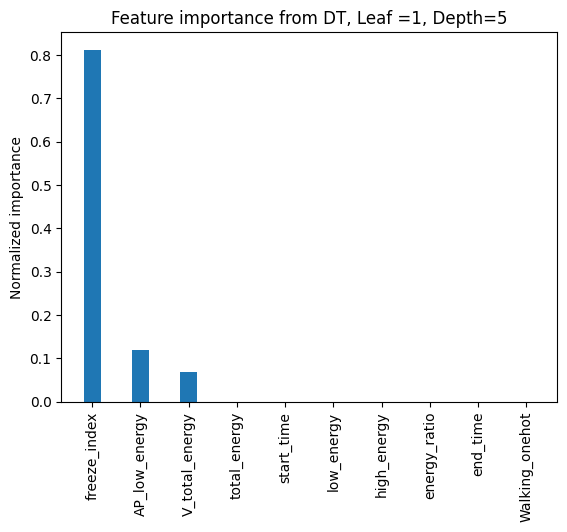

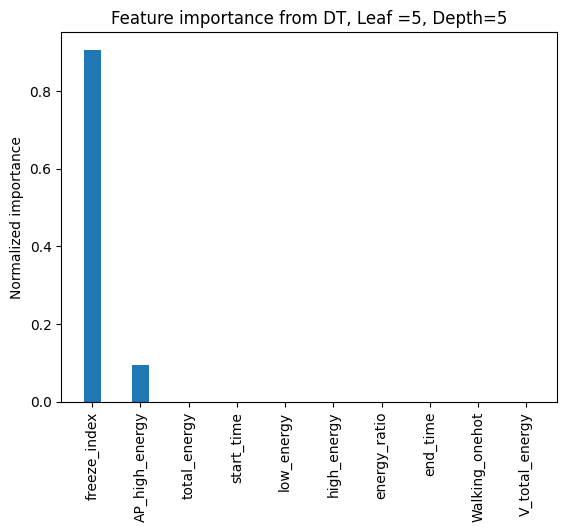

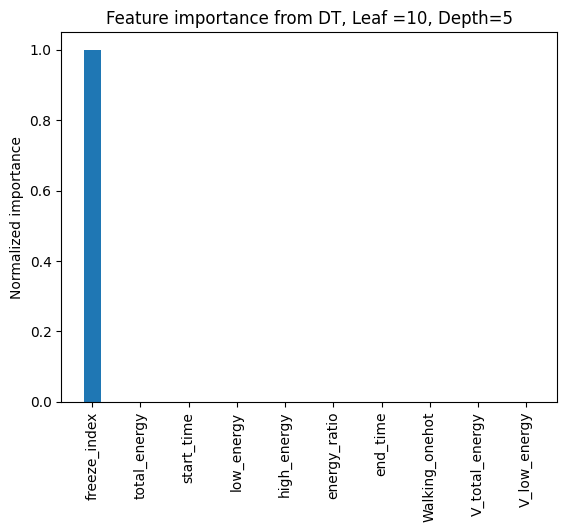

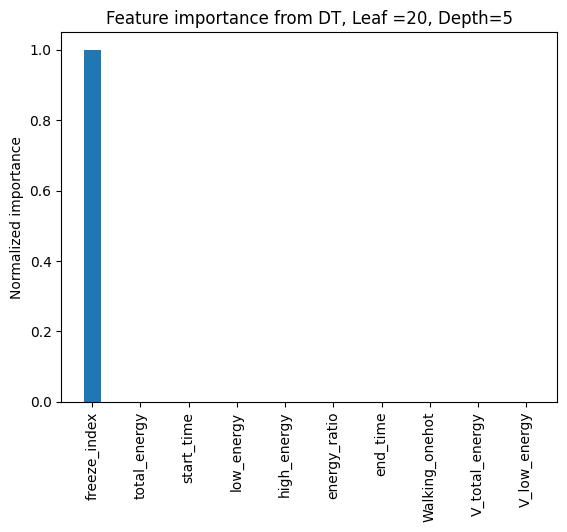

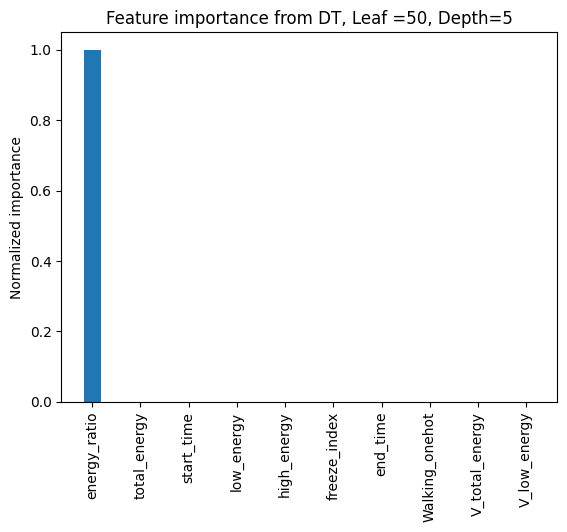

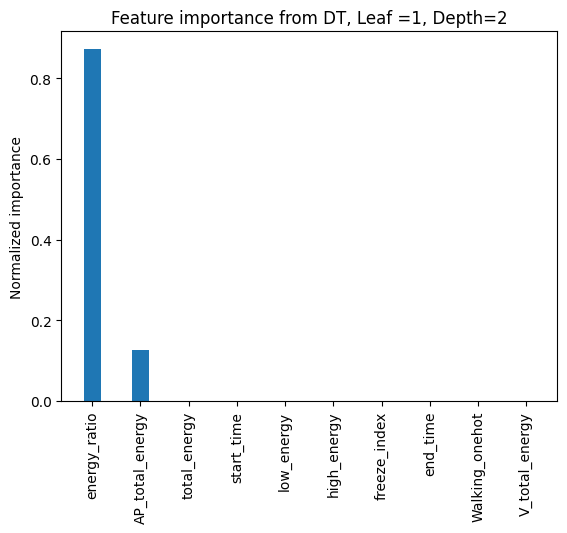

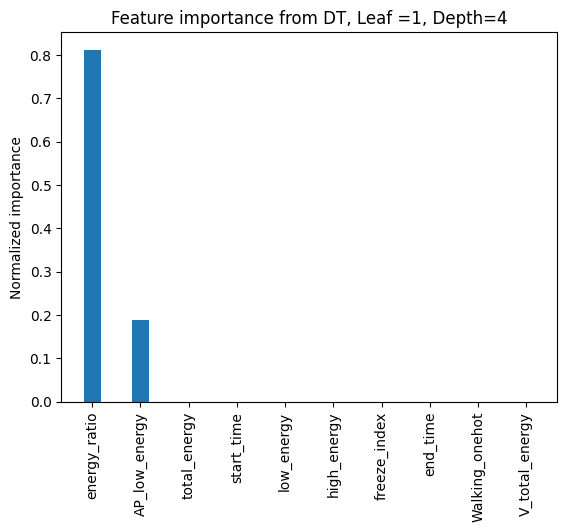

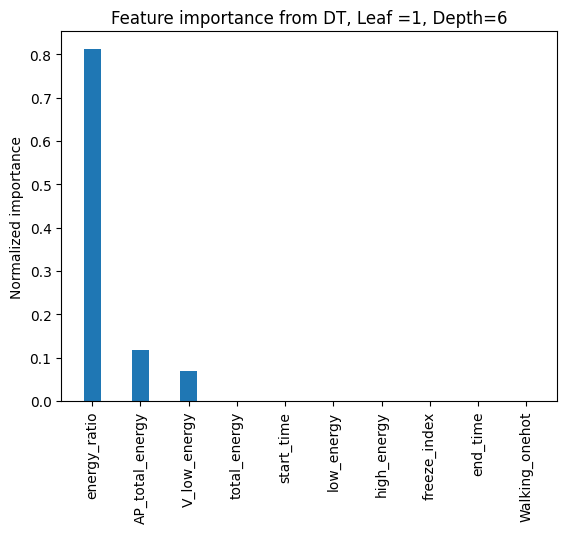

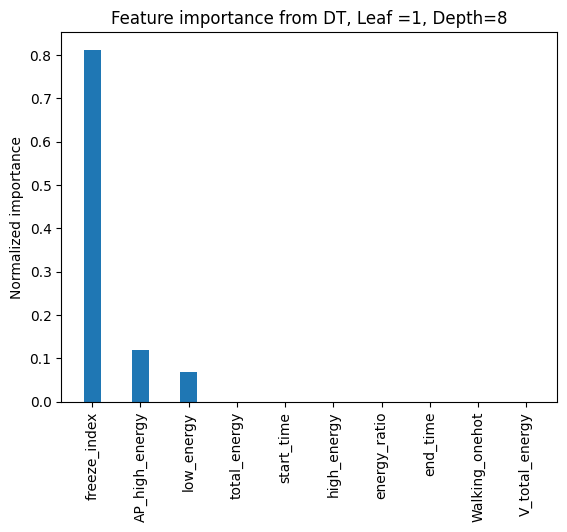

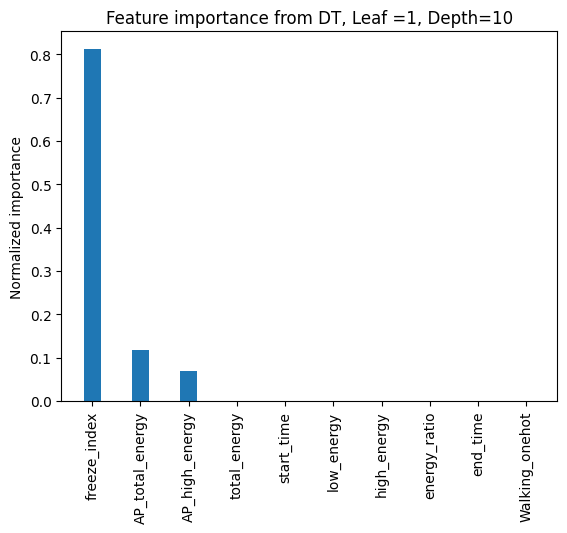

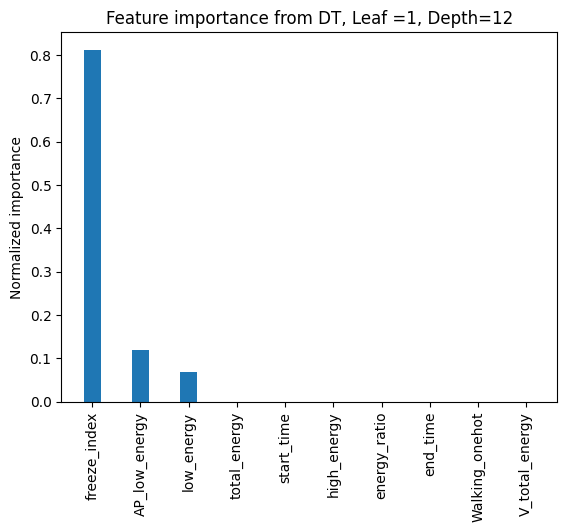

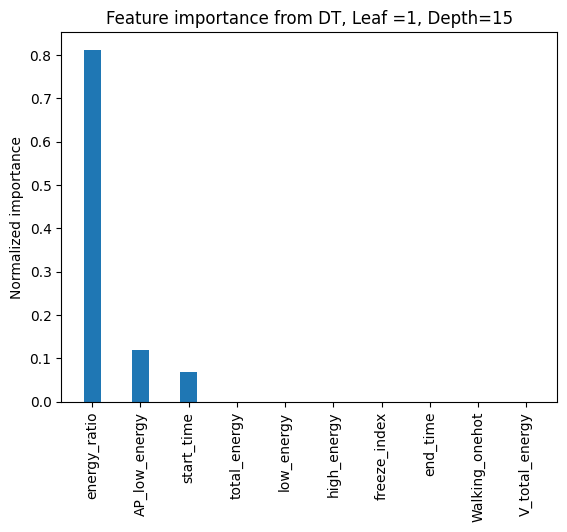

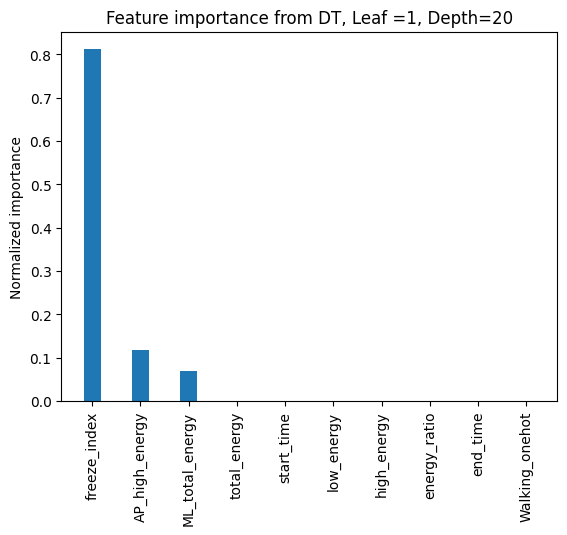

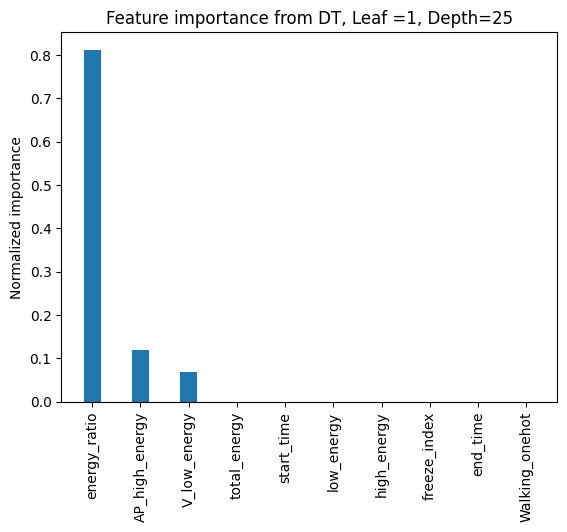

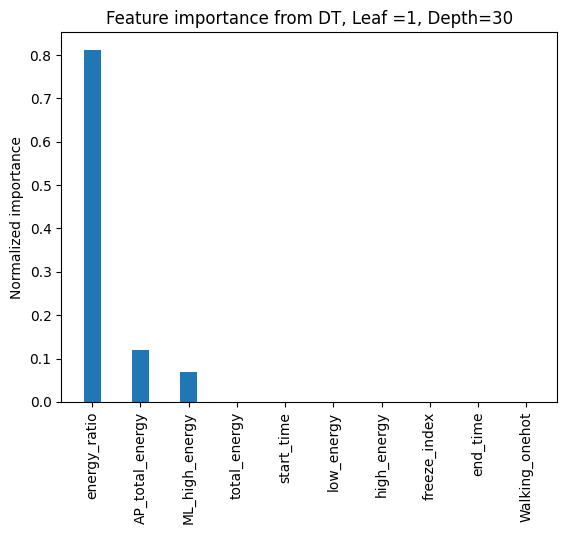

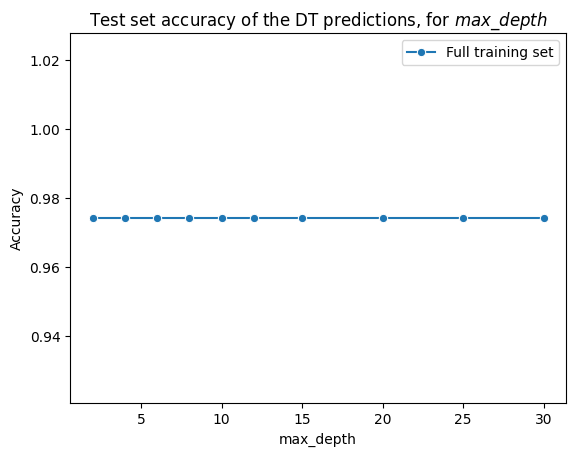

{'max_depth': [1, 2, 4, 8, 16, 32], 'min_samples_leaf': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}


Best value for max depth: 8
Best value for the minimum number of samples required to be at a leaf node: 2
Accuracy score: 0.9851851851851852
Confusion Matrix for the model: 
[[  0   3]
 [  0 113]]


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


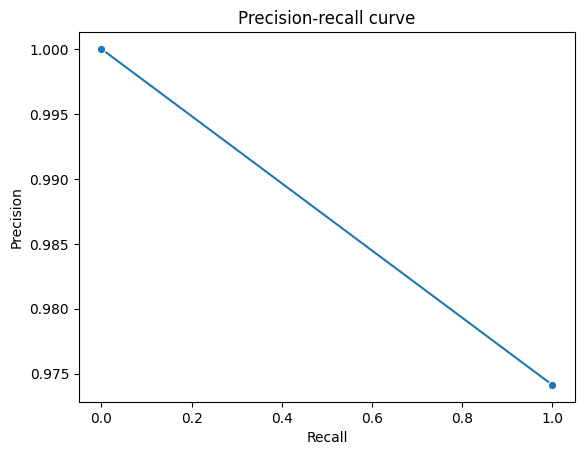

In [414]:
DT_model(energy_df)
#DT_model(extracted_features)

Prepare Data <br>
Identify and handling missing data 

In [ ]:
#check if df is missing values in each column
nan_count = energy_df.isna().sum

#you can drop the data if too many missing, or replace w mean
#if the column has string replace the missing with a string like "unavailable"
print(energy_df.dtypes)

One-hot encoding - transform string valued categorical features into numerical boolean values using one-hot encoding 

classification report - part of sklearn metrics library 


## Evaluation of decision tree
#### Confusion Matrix 
#### AUC-ROC curve 